In [1]:
import gdown
import zipfile

# Step 1: Download the zip file from Google Drive
file_id = '1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.zip'

gdown.download(url, output, quiet=False)

# Step 2: Unzip the dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # You can change 'dataset' to any folder name you prefer


Downloading...
From (original): https://drive.google.com/uc?id=1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0
From (redirected): https://drive.google.com/uc?id=1H7OJNxL3fmR1tHqkcUDHRZWq0jhRi-G0&confirm=t&uuid=c808ad07-195f-4e73-bd1c-fb09e2afcd1a
To: C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\dataset.zip
100%|██████████| 76.3M/76.3M [00:07<00:00, 9.68MB/s]


r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",            # Replace with your path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


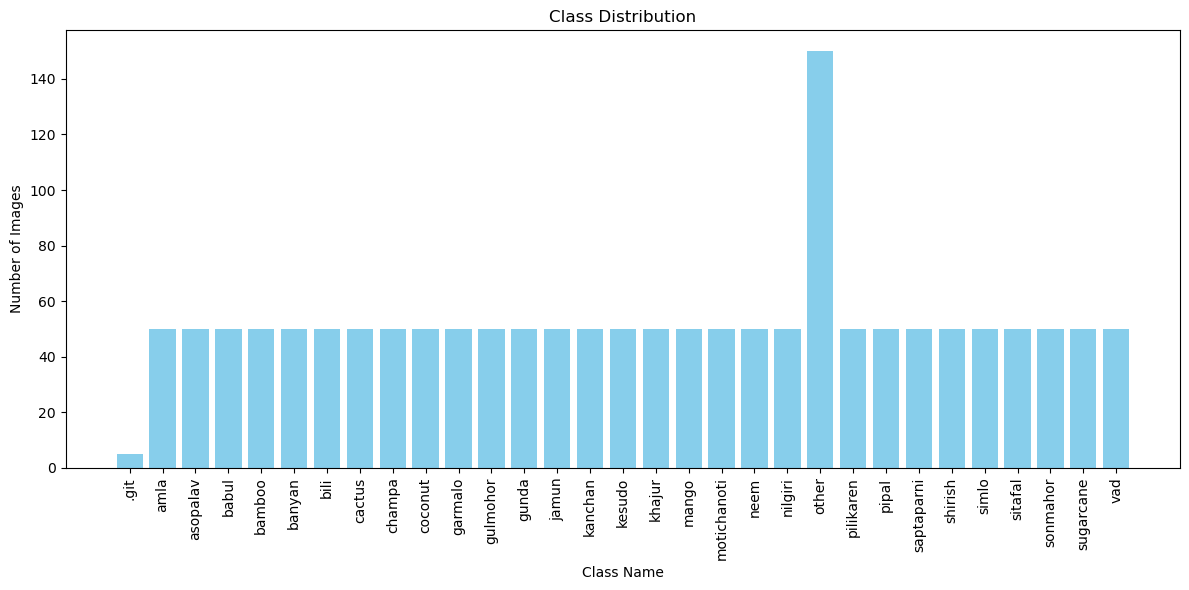

In [6]:
import os
import matplotlib.pyplot as plt

# Set the correct path to your unzipped dataset
data_path = r"C:\Users\kirti\Desktop\Desktop47\Projects\Green skills Ai internship Edunet\Tree_species_classification\Tree_Species_Dataset"  # <-- replace if your folder is named differently

# Count number of images in each class folder
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in os.listdir(data_path)}

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


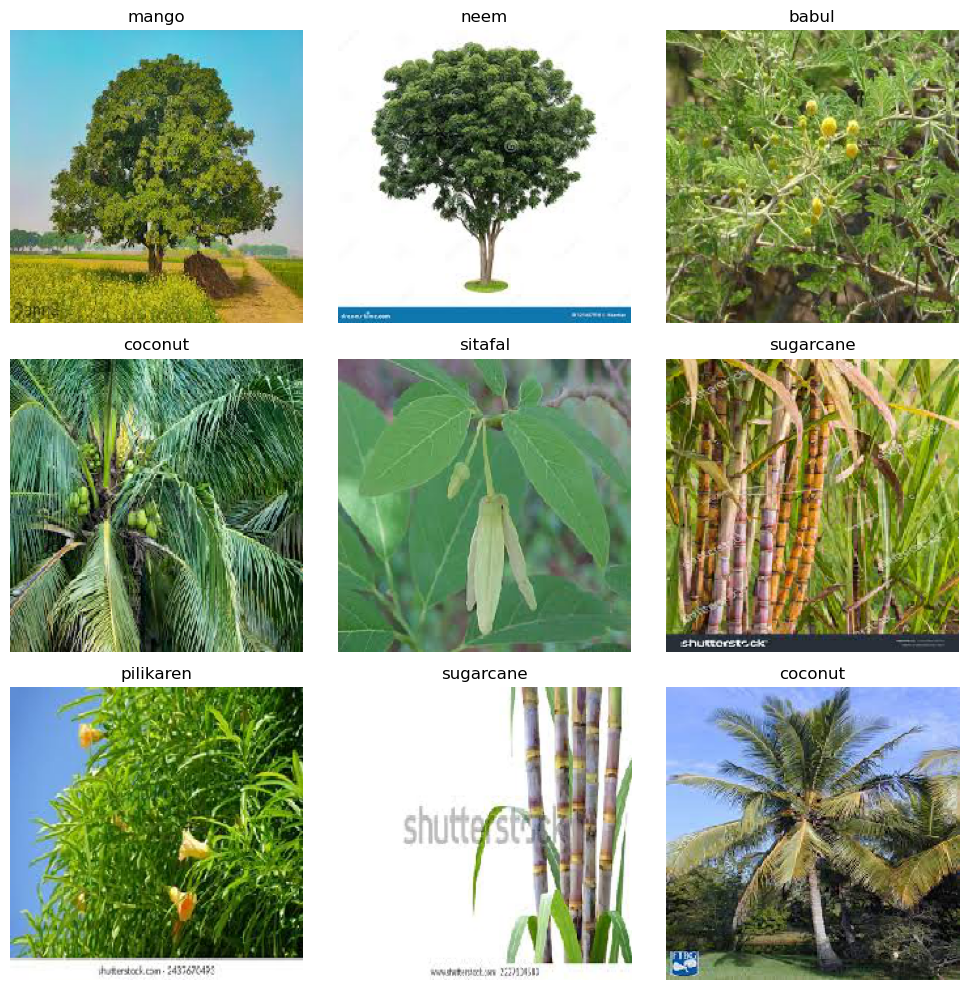

In [7]:
import numpy as np

class_names = list(train_data.class_indices.keys())
images, labels = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')
plt.tight_layout()
plt.show()
